<a href="https://colab.research.google.com/github/PROMITAGHOSH12/ADME-Property-Prediction_Caco-2/blob/main/DILI_ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
pip install pyTDC

In [ ]:
pip install rdkit-pypi

In [ ]:
from tdc import utils
names = utils.retrieve_benchmark_names('ADMET_Group')
from tdc.benchmark_group import admet_group
group = admet_group(path = 'data/')

Found local copy...


In [ ]:
benchmark = group.get('dili')

In [ ]:
name = benchmark['name']
train_val, test = benchmark['train_val'], benchmark['test']
#Spliting the data
train, valid = group.get_train_valid_split(benchmark = name, split_type = 'scaffold',seed=2)

generating training, validation splits...
100%|██████████| 379/379 [00:00<00:00, 2734.95it/s]


In [ ]:
print(train.shape)
train.head(3)

(331, 3)


,Drug_ID,Drug,Y
0,3821.0,CNC1(c2ccccc2Cl)CCCCC1=O,0.0
1,54678501.0,O=C1OC(C(O)CO)C(O)=C1O,0.0
2,4601.0,Cc1ccccc1C(OCCN(C)C)c1ccccc1,0.0


In [ ]:
print(test.shape)
test.head(3)

(96, 3)


,Drug_ID,Drug,Y
0,443884.0,CC(CO)NC(=O)C1C=C2c3cccc4[nH]cc(c34)CC2N(C)C1,0.0
1,9681.0,CCC(CO)NC(=O)C1C=C2c3cccc4c3c(cn4C)CC2N(C)C1,0.0
2,8226.0,CCC(CO)NC(=O)C1C=C2c3cccc4[nH]cc(c34)CC2N(C)C1,0.0


In [ ]:
print(valid.shape)
valid.head(3)

(48, 3)


,Drug_ID,Drug,Y
0,5509.0,Cc1ccc(C(=O)c2ccc(CC(=O)O)n2C)cc1,1.0
1,4046.0,OC(c1cc(C(F)(F)F)nc2c(C(F)(F)F)cccc12)C1CCCCN1,0.0
2,126941.0,CN(Cc1cnc2nc(N)nc(N)c2n1)c1ccc(C(=O)NC(CCC(=O)...,1.0


In [ ]:
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import Descriptors
from rdkit.Chem import AllChem
from rdkit import DataStructs
import numpy as np
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense

TRAIN

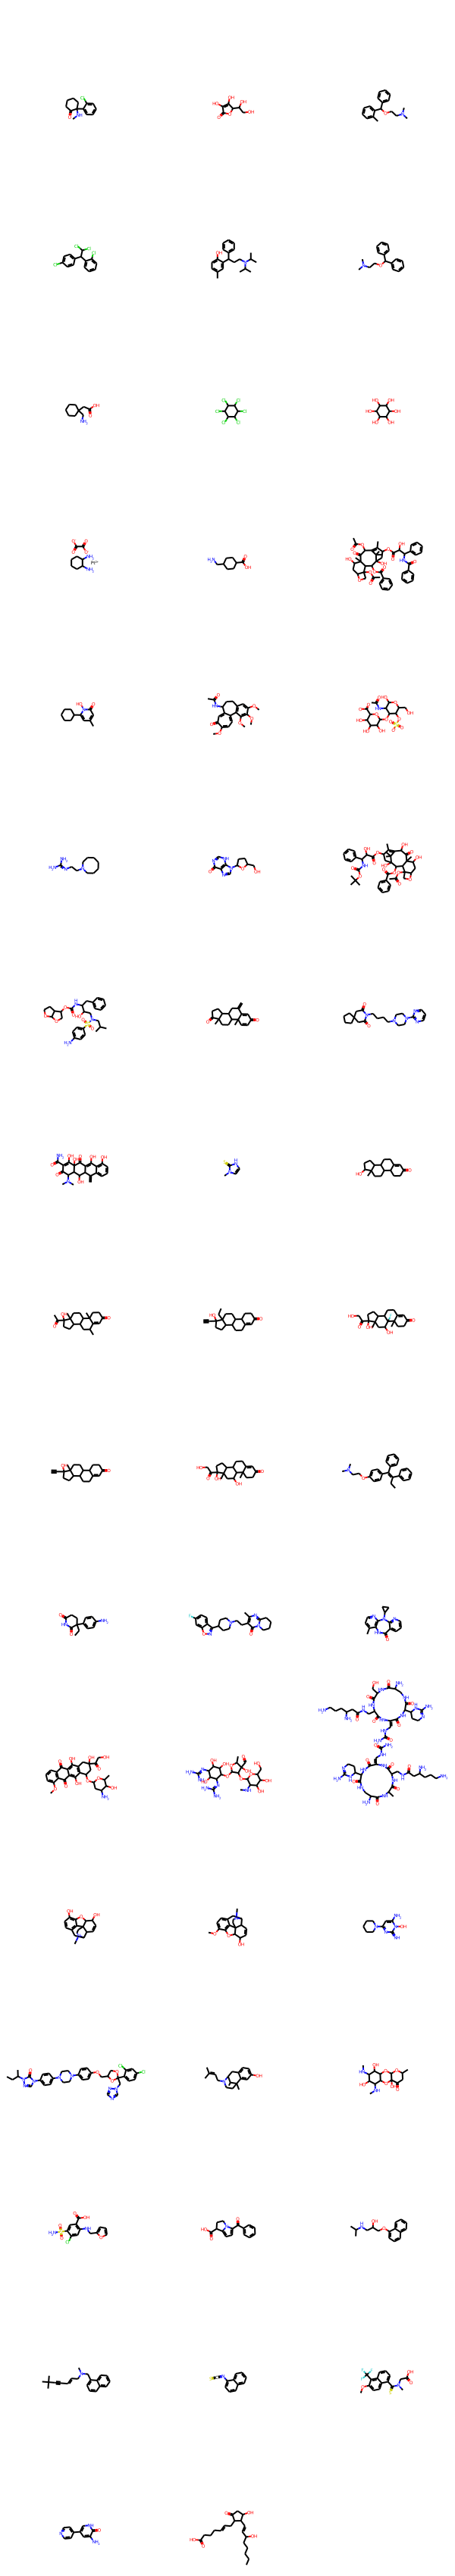

In [ ]:
smiles_list=train.Drug

mol_list1=[]
for smiles in smiles_list:
    mol= Chem.MolFromSmiles(smiles)
    mol_list1.append(mol)

img = Draw.MolsToGridImage(mol_list1)    
img

In [ ]:
finger_print_list = []
length_list=[]

for compound in mol_list1 :
    finger_print=AllChem.GetMorganFingerprintAsBitVect(compound,2,nBits=1024)
    fp_arr1=np.zeros((1,))
    DataStructs.ConvertToNumpyArray(finger_print,fp_arr1)
    fp2=np.resize(fp_arr1, 1024)
    finger_print_list.append(np.asarray(fp2).astype(np.float32))
    
train["finger_prints"] = finger_print_list

In [ ]:
train

,Drug_ID,Drug,Y,finger_prints
0,3821.0,CNC1(c2ccccc2Cl)CCCCC1=O,0.0,"[0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, ..."
1,54678501.0,O=C1OC(C(O)CO)C(O)=C1O,0.0,"[0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
2,4601.0,Cc1ccccc1C(OCCN(C)C)c1ccccc1,0.0,"[0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
3,4211.0,Clc1ccc(C(c2ccccc2Cl)C(Cl)Cl)cc1,0.0,"[0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
4,60774.0,Cc1ccc(O)c(C(CCN(C(C)C)C(C)C)c2ccccc2)c1,0.0,"[0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
...,...,...,...,...
326,4912.0,CC(C)(Sc1cc(C(C)(C)C)c(O)c(C(C)(C)C)c1)Sc1cc(C...,0.0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
327,5284594.0,C=C1CCC2(O)C3Cc4ccc(O)c5c4C2(CCN3CC2CC2)C1O5,0.0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
328,5591.0,Cc1c(C)c2c(c(C)c1O)CCC(C)(COc1ccc(CC3SC(=O)NC3...,1.0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
329,104865.0,COc1ccccc1Oc1c(NS(=O)(=O)c2ccc(C(C)(C)C)cc2)nc...,1.0,"[0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, ..."


In [ ]:
train_x=train.finger_prints

In [ ]:
train_x = np.array([np.array(val) for val in train_x])
train_x

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [ ]:
train_y=np.array(train.Y)
train_y

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 1.,
       1., 1., 1., 0., 1., 1., 1., 0., 0., 0., 0., 0., 1., 0., 1., 1., 1.,
       0., 0., 0., 0., 0., 1., 0., 0., 1., 1., 0., 1., 1., 1., 1., 0., 0.,
       0., 1., 1., 1., 1., 0., 0., 1., 1., 0., 1., 0., 1., 0., 1., 1., 1.,
       1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0.,
       1., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1.,
       1., 0., 0., 1., 0., 1., 0., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1.,
       0., 0., 1., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
       0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0.,
       0., 1., 0., 1., 1., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 1., 1., 1., 1.,
       0., 0., 0., 1., 1., 1., 0., 0., 1., 1., 1., 1., 1., 1., 0., 0., 0.,
       0., 0., 0., 0., 1.

In [ ]:
train_x = np.asarray(train_x).astype(np.float32)
train_y = np.asarray(train_y).astype(np.float32)
train_dataset = tf.data.Dataset.from_tensor_slices((train_x, train_y))

TEST

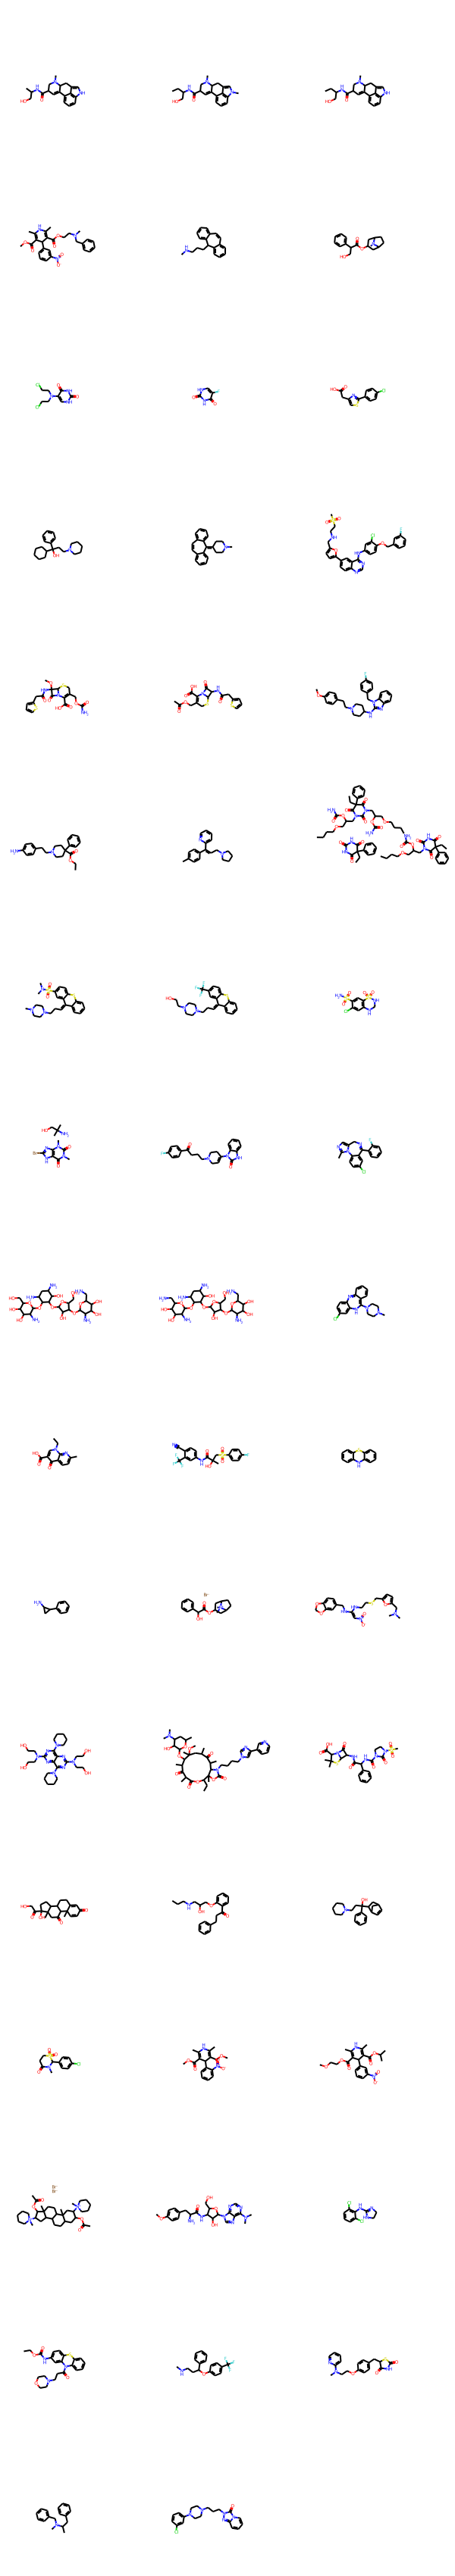

In [ ]:
smiles_list=test.Drug

mol_list2=[]
for smiles in smiles_list:
    mol= Chem.MolFromSmiles(smiles)
    mol_list2.append(mol)

img = Draw.MolsToGridImage(mol_list2)    
img

In [ ]:
finger_print_list = []
length_list=[]
for compound in mol_list2 :
    finger_print=AllChem.GetMorganFingerprintAsBitVect(compound,2,nBits=1024)
    fp_arr2=np.zeros((1,))
    DataStructs.ConvertToNumpyArray(finger_print,fp_arr2)
    fp3=np.resize(fp_arr2, 1024)
    finger_print_list.append(np.asarray(fp3).astype(np.float32))
    
test["finger_prints"] = finger_print_list

In [ ]:
test

,Drug_ID,Drug,Y,finger_prints
0,443884.0,CC(CO)NC(=O)C1C=C2c3cccc4[nH]cc(c34)CC2N(C)C1,0.0,"[0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
1,9681.0,CCC(CO)NC(=O)C1C=C2c3cccc4c3c(cn4C)CC2N(C)C1,0.0,"[0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
2,8226.0,CCC(CO)NC(=O)C1C=C2c3cccc4[nH]cc(c34)CC2N(C)C1,0.0,"[0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
3,4474.0,COC(=O)C1=C(C)NC(C)=C(C(=O)OCCN(C)Cc2ccccc2)C1...,1.0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
4,4976.0,CNCCCC1c2ccccc2C=Cc2ccccc21,0.0,"[0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
...,...,...,...,...
91,3724.0,CC(=O)N(CC(O)CN(C(C)=O)c1c(I)c(C(=O)NCC(O)CO)c...,0.0,"[0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
92,4917.0,CN1CCN(CCCN2c3ccccc3Sc3ccc(Cl)cc32)CC1,1.0,"[0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, ..."
93,5291.0,Cc1ccc(NC(=O)c2ccc(CN3CCN(C)CC3)cc2)cc1Nc1nccc...,1.0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
94,5717.0,COc1cc(C(=O)NS(=O)(=O)c2ccccc2C)ccc1Cc1cn(C)c2...,1.0,"[0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, ..."


In [ ]:
test_x=test.finger_prints

In [ ]:
test_x = np.array([np.array(val) for val in test_x])
test_x

array([[0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [ ]:
test_y=np.array(test.Y)
test_y

array([0., 0., 0., 1., 0., 0., 1., 1., 1., 0., 1., 1., 1., 1., 0., 0., 0.,
       1., 1., 0., 1., 0., 0., 0., 0., 0., 1., 1., 1., 1., 0., 0., 1., 1.,
       1., 1., 0., 0., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 0., 1., 0.,
       0., 1., 1., 1., 0., 1., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0.,
       0., 1., 0., 0., 1., 1., 1., 0., 0., 1., 0., 0., 1., 1., 1., 1., 0.,
       1., 1., 0., 1., 1., 0., 0., 1., 1., 1., 1.])

In [ ]:
test_x = np.asarray(test_x).astype(np.float32)
test_y = np.asarray(test_y).astype(np.float32)
test_dataset = tf.data.Dataset.from_tensor_slices((test_x, test_y))

valid

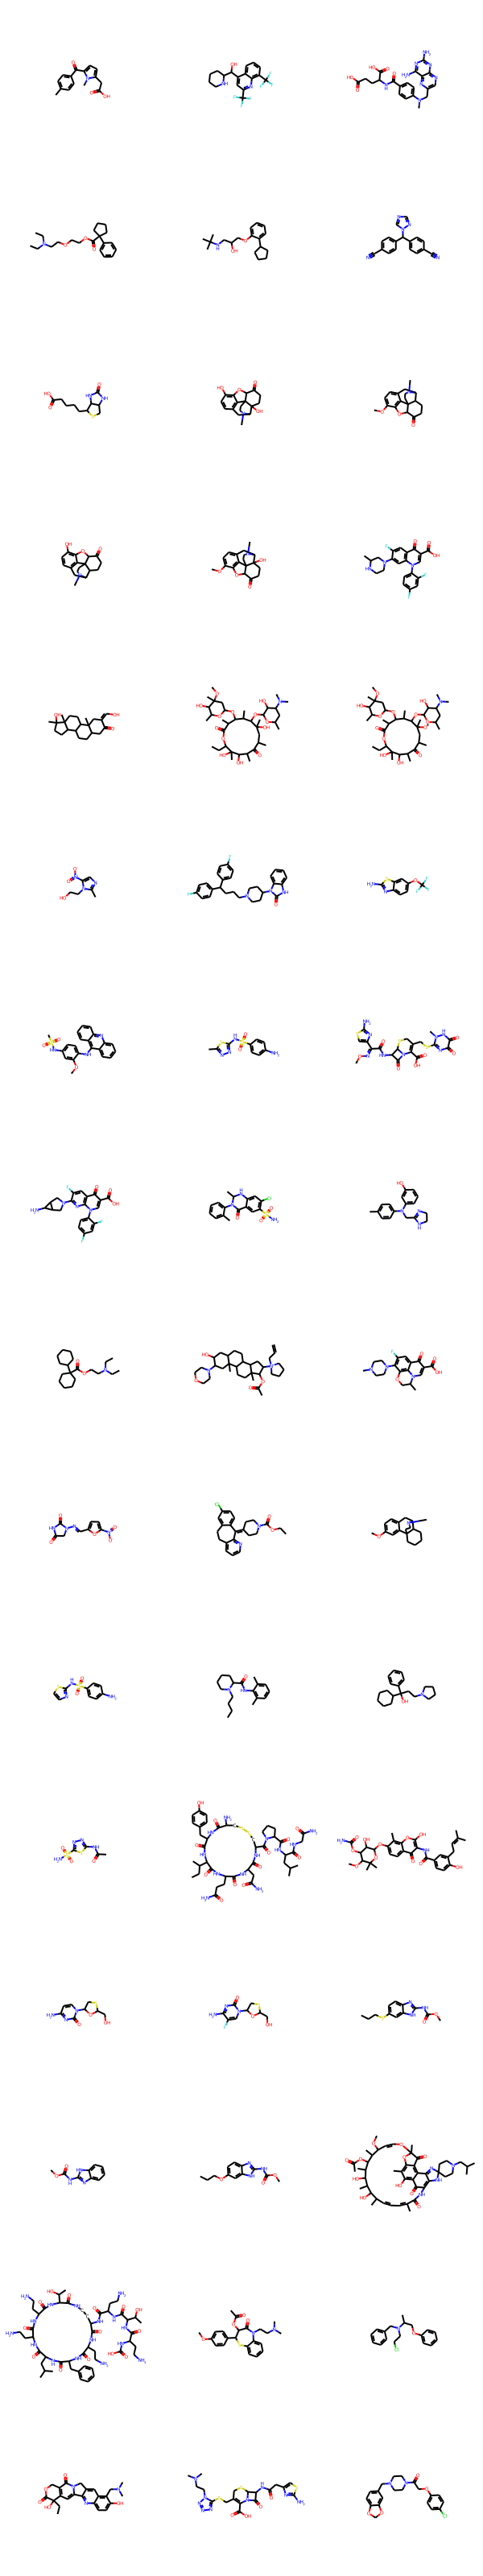

In [ ]:
smiles_list=valid.Drug

mol_list3=[]
for smiles in smiles_list:
    mol= Chem.MolFromSmiles(smiles)
    mol_list3.append(mol)

img = Draw.MolsToGridImage(mol_list3)    
img

In [ ]:
finger_print_list = []
length_list=[]
for compound in mol_list3 :
    finger_print=AllChem.GetMorganFingerprintAsBitVect(compound,2,nBits=1024)
    fp_arr3=np.zeros((1,))
    DataStructs.ConvertToNumpyArray(finger_print,fp_arr3)
    fp4=np.resize(fp_arr3, 1024)
    finger_print_list.append(np.asarray(fp4).astype(np.float32))
    
valid["finger_prints"] = finger_print_list

In [ ]:
valid

,Drug_ID,Drug,Y,finger_prints
0,5509.0,Cc1ccc(C(=O)c2ccc(CC(=O)O)n2C)cc1,1.0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
1,4046.0,OC(c1cc(C(F)(F)F)nc2c(C(F)(F)F)cccc12)C1CCCCN1,0.0,"[0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, ..."
2,126941.0,CN(Cc1cnc2nc(N)nc(N)c2n1)c1ccc(C(=O)NC(CCC(=O)...,1.0,"[0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
3,2562.0,CCN(CC)CCOCCOC(=O)C1(c2ccccc2)CCCC1,0.0,"[0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, ..."
4,37464.0,CC(C)(C)NCC(O)COc1ccccc1C1CCCC1,0.0,"[0.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, ..."
5,3902.0,N#Cc1ccc(C(c2ccc(C#N)cc2)n2cncn2)cc1,1.0,"[0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
6,171548.0,O=C(O)CCCCC1SCC2NC(=O)NC21,0.0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
7,5284604.0,CN1CCC23c4c5ccc(O)c4OC2C(=O)CCC3(O)C1C5,0.0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
8,5284569.0,COc1ccc2c3c1OC1C(=O)CCC4C(C2)N(C)CCC314,0.0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
9,5284570.0,CN1CCC23c4c5ccc(O)c4OC2C(=O)CCC3C1C5,0.0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."


In [ ]:
valid_x=valid.finger_prints

In [ ]:
valid_x = np.array([np.array(val) for val in valid_x])
valid_x

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [ ]:
valid_y=np.array(valid.Y)
valid_y

array([1., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 0.,
       1., 1., 1., 1., 1., 1., 0., 0., 0., 1., 1., 0., 0., 1., 0., 0., 1.,
       0., 1., 1., 1., 1., 1., 1., 1., 0., 1., 0., 0., 1., 1.])

In [ ]:
valid_x = np.asarray(valid_x).astype(np.float32)
valid_y = np.asarray(valid_y).astype(np.float32)
valid_dataset = tf.data.Dataset.from_tensor_slices((valid_x, valid_y))

In [ ]:
from keras.models import Sequential
from keras.layers import Dense

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1024)              1049600   
                                                                 
 dense_1 (Dense)             (None, 16)                16400     
                                                                 
 dense_2 (Dense)             (None, 1)                 17        
                                                                 
Total params: 1,066,017
Trainable params: 1,066,017
Non-trainable params: 0
_________________________________________________________________
Epoch 1/25
34/34 [==============================] - 1s 12ms/step - loss: 0.6926 - accuracy: 0.5227 - val_loss: 0.6940 - val_accuracy: 0.5417
Epoch 2/25
34/34 [==============================] - 0s 5ms/step - loss: 0.6784 - accuracy: 0.6073 - val_loss: 0.6915 - val_accuracy: 0.5625
Epoch 3/25
34/34 [===========

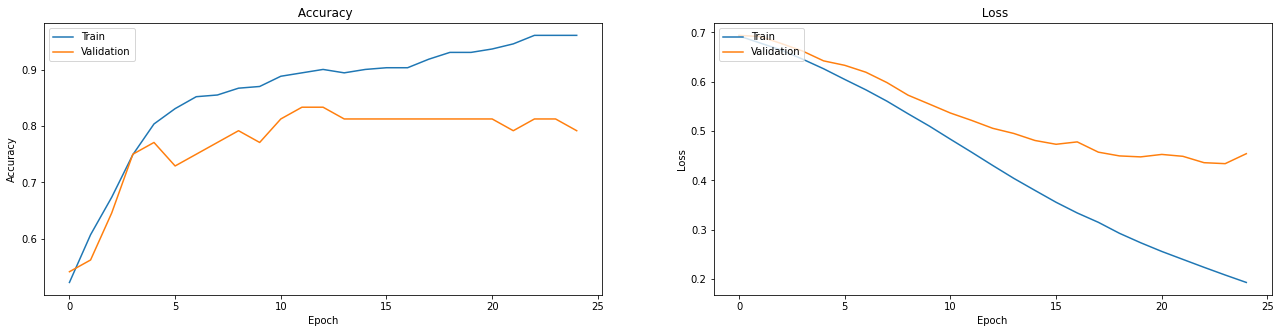

5/5 [==============================] - 0s 4ms/step - loss: 0.4935 - accuracy: 0.8021


[0.49352124333381653, 0.8020833134651184]

In [ ]:
classifier= Sequential()
classifier.add(Dense(units = 1024, activation= 'relu', input_dim=1024))
# classifier.add(Dense(units = 256, activation= 'relu'))
# classifier.add(Dense(units = 64, activation= 'relu'))
classifier.add(Dense(units = 16, activation= 'relu'))
classifier.add(Dense(units = 1, activation= 'sigmoid'))

classifier.compile(
        optimizer = "sgd", 
        loss = "binary_crossentropy", 
        metrics = ["accuracy"]
    )

classifier.summary()
    
callback = tf.keras.callbacks.EarlyStopping(
                monitor = "val_loss",
                patience = 5, 
                verbose = 1, 
                mode = "auto",
                baseline = None, 
                restore_best_weights = True
            )

history = classifier.fit(
                train_x, train_y,
                batch_size = 10,
                verbose = 1,
                epochs = 25,
                validation_data = (valid_x, valid_y),
                callbacks = [callback],
            )


    ## Accuracy and Loss Plots

fig, axes = plt.subplots(1, 2, figsize = [22,5])
ax1,ax2 = axes.flatten()

ax1.plot(history.history["accuracy"])
ax1.plot(history.history["val_accuracy"])
ax1.set_title(" Accuracy")
ax1.set_ylabel("Accuracy")
ax1.set_xlabel("Epoch")
ax1.legend(["Train", "Validation"], loc = "upper left")

ax2.plot(history.history["loss"])
ax2.plot(history.history["val_loss"])
ax2.set_title(" Loss")
ax2.set_ylabel("Loss")
ax2.set_xlabel("Epoch")
ax2.legend(["Train", "Validation"], loc = "upper left")

plt.show()
    
classifier.evaluate(
    test_x, test_y,
    batch_size = 20,
    verbose = 1
)